In [8]:
import pandas as pd

file_path = "the-reddit-climate-change-dataset-posts.csv"

full_df = pd.read_csv(file_path)

print(full_df.head())


   type      id subreddit.id       subreddit.name  subreddit.nsfw  \
0  post  x2smmw        2vh0v  democraticsocialism           False   
1  post  x2slxy        2w844    nostupidquestions           False   
2  post  x2slk5       6wzx9b           eduwriters           False   
3  post  x2sbz6       46adh7  alternatitvereality           False   
4  post  x2sa2a        2qh1i            askreddit           False   

   created_utc                                          permalink  \
0   1661990237  https://old.reddit.com/r/DemocraticSocialism/c...   
1   1661990182  https://old.reddit.com/r/NoStupidQuestions/com...   
2   1661990150  https://old.reddit.com/r/EduWriters/comments/x...   
3   1661989389  https://old.reddit.com/r/AlternatitveReality/c...   
4   1661989240  https://old.reddit.com/r/AskReddit/comments/x2...   

                   domain                                                url  \
0             twitter.com  https://twitter.com/SusanofTexas/status/156480...   
1  self.no

In [9]:
df = full_df[['id', 'subreddit.id', 'subreddit.name', 'created_utc', 'permalink', 'selftext', 'title']]
print(df.head())

       id subreddit.id       subreddit.name  created_utc  \
0  x2smmw        2vh0v  democraticsocialism   1661990237   
1  x2slxy        2w844    nostupidquestions   1661990182   
2  x2slk5       6wzx9b           eduwriters   1661990150   
3  x2sbz6       46adh7  alternatitvereality   1661989389   
4  x2sa2a        2qh1i            askreddit   1661989240   

                                           permalink  \
0  https://old.reddit.com/r/DemocraticSocialism/c...   
1  https://old.reddit.com/r/NoStupidQuestions/com...   
2  https://old.reddit.com/r/EduWriters/comments/x...   
3  https://old.reddit.com/r/AlternatitveReality/c...   
4  https://old.reddit.com/r/AskReddit/comments/x2...   

                                            selftext  \
0                                                NaN   
1  Ok so I was having a conversation with my neig...   
2                                                NaN   
3                                                NaN   
4                     

In [10]:
df['selftext'] = df['selftext'].fillna("")
df = df.dropna()
df['title'] = df['title'].str.strip()
df['selftext'] = df['selftext'].str.strip()

def combineBody(selfText):
    if selfText:
        return " || "+selfText
    else:
        return ""

df['full_text'] = df['title'] + df['selftext'].apply(combineBody)

/var/folders/yb/z8mx5m8d0czfjf_pttsr9nvw0000gn/T/ipykernel_43489/161382533.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['selftext'] = df['selftext'].fillna("")


In [11]:
from sentence_transformers import SentenceTransformer
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
#embeddings = model.encode(df['full_text'].tolist(), show_progress_bar=True)
#np.save('reddit_post_embeddings.npy', embeddings)

In [12]:
from sklearn.preprocessing import normalize

embeddings = np.load('reddit_post_embeddings.npy')
embeddings_norm = normalize(embeddings)

In [13]:
embeddings_norm

array([[ 0.01911449,  0.08839922,  0.07953402, ..., -0.0453781 ,
        -0.03585287, -0.03531672],
       [-0.00490727, -0.00725093,  0.15046571, ..., -0.03163256,
        -0.00867664,  0.09229512],
       [-0.03016422,  0.07603418,  0.09641286, ...,  0.0562212 ,
        -0.10158484,  0.00814143],
       ...,
       [-0.03246277,  0.03256118,  0.06913429, ..., -0.0876077 ,
        -0.05000049,  0.01752428],
       [-0.03271546,  0.01770769,  0.13091432, ..., -0.06087812,
        -0.08645944,  0.02098747],
       [-0.0248879 ,  0.06070558,  0.10153993, ..., -0.00418753,
        -0.06106044,  0.10117906]], shape=(620908, 384), dtype=float32)

In [14]:
import matplotlib.pyplot as plt

In [72]:
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)
sample_indices = np.random.choice(len(embeddings_norm), size=20000, replace=False)
emb_sample = embeddings_norm[sample_indices]

silhouette_scores = []
K = range(3, 50)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000, verbose=0)
    kmeans.fit(embeddings_norm)   
    labels_sample = kmeans.predict(emb_sample)
    print("K Means done for k="+str(k))
    score = silhouette_score(emb_sample, labels_sample, metric='cosine')
    silhouette_scores.append(score)
    print("Silhouette score calculated for k="+str(k))

K Means done for k=3
Silhouette score calculated for k=3
K Means done for k=4
Silhouette score calculated for k=4
K Means done for k=5
Silhouette score calculated for k=5
K Means done for k=6
Silhouette score calculated for k=6
K Means done for k=7
Silhouette score calculated for k=7
K Means done for k=8
Silhouette score calculated for k=8
K Means done for k=9
Silhouette score calculated for k=9
K Means done for k=10
Silhouette score calculated for k=10
K Means done for k=11
Silhouette score calculated for k=11
K Means done for k=12
Silhouette score calculated for k=12
K Means done for k=13
Silhouette score calculated for k=13
K Means done for k=14
Silhouette score calculated for k=14
K Means done for k=15
Silhouette score calculated for k=15
K Means done for k=16
Silhouette score calculated for k=16
K Means done for k=17
Silhouette score calculated for k=17
K Means done for k=18
Silhouette score calculated for k=18
K Means done for k=19
Silhouette score calculated for k=19
K Means don

In [73]:
# sample used above because 600k is too large to calculate silhouette score!

In [74]:
np.save('silhouette_scores.npy', silhouette_scores)

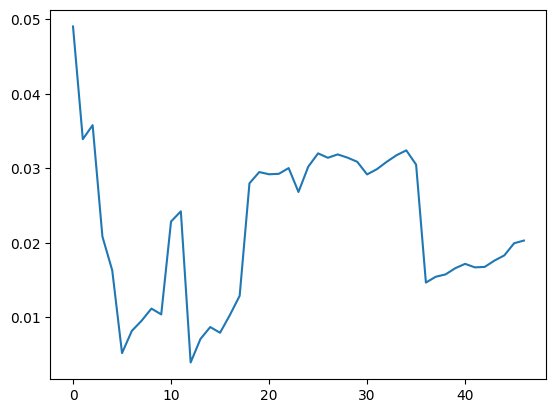

In [15]:
silhouette_scores = np.load('silhouette_scores.npy')
plt.plot(silhouette_scores)

In [16]:
silhouette_scores

array([0.04904899, 0.03391025, 0.03579795, 0.02083347, 0.01630273,
       0.00518363, 0.00816819, 0.00953711, 0.01116389, 0.01038151,
       0.02285629, 0.02422501, 0.00392558, 0.0070822 , 0.00868448,
       0.00791542, 0.01029227, 0.01287763, 0.02798766, 0.02949846,
       0.02920057, 0.02926321, 0.03003372, 0.02682367, 0.03022604,
       0.03200919, 0.03141379, 0.03186925, 0.03143749, 0.03087227,
       0.02917965, 0.02988558, 0.0308731 , 0.03175786, 0.03240952,
       0.03049972, 0.01465504, 0.01543839, 0.01575093, 0.0165893 ,
       0.01717062, 0.01669585, 0.01676282, 0.0176123 , 0.01830607,
       0.01993937, 0.02029958])

In [56]:
silhouette_scores2 = []
K = range(100, 1100, 100)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000, verbose=0)
    kmeans.fit(embeddings)   
    labels_sample = kmeans.predict(emb_sample)
    print("K Means done for k="+str(k))
    score = silhouette_score(emb_sample, labels_sample, metric='cosine')
    silhouette_scores2.append(score)
    print("Silhouette score calculated for k="+str(k))

K Means done for k=100
Silhouette score calculated for k=100
K Means done for k=200
Silhouette score calculated for k=200
K Means done for k=300
Silhouette score calculated for k=300
K Means done for k=400
Silhouette score calculated for k=400
K Means done for k=500
Silhouette score calculated for k=500
K Means done for k=600
Silhouette score calculated for k=600
K Means done for k=700
Silhouette score calculated for k=700
K Means done for k=800
Silhouette score calculated for k=800
K Means done for k=900
Silhouette score calculated for k=900
K Means done for k=1000
Silhouette score calculated for k=1000


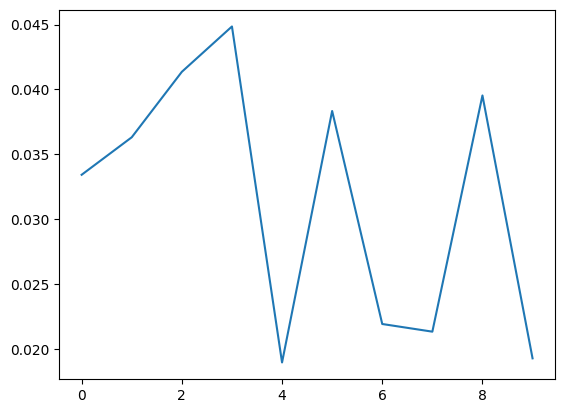

In [57]:
plt.plot(silhouette_scores2)

In [58]:
silhouette_scores2

[0.03342295438051224,
 0.036315590143203735,
 0.04136278107762337,
 0.044859010726213455,
 0.018948394805192947,
 0.03834234178066254,
 0.021915601566433907,
 0.02132471837103367,
 0.03953995183110237,
 0.019267195835709572]

In [ ]:
# consistently really low silhouette scores, so trying elbow method instead!

In [77]:
inertias = []
K = range(50, 501, 50)
for k in K:
    kmeans = MiniBatchKMeans(n_clusters=k, random_state=42, batch_size=10000)
    kmeans.fit(emb_sample)
    print("Inertias calculated for k="+str(k))
    inertias.append(kmeans.inertia_)

# inertias = [10495.34765625,
 9908.205078125,
 9545.181640625,
 9256.53515625,
 9055.2978515625,
 8876.62890625,
 8713.2060546875,
 8583.6953125,
 8483.40234375,
 8342.671875]

Inertias calculated for k=50
Inertias calculated for k=100
Inertias calculated for k=150
Inertias calculated for k=200
Inertias calculated for k=250
Inertias calculated for k=300
Inertias calculated for k=350
Inertias calculated for k=400
Inertias calculated for k=450
Inertias calculated for k=500


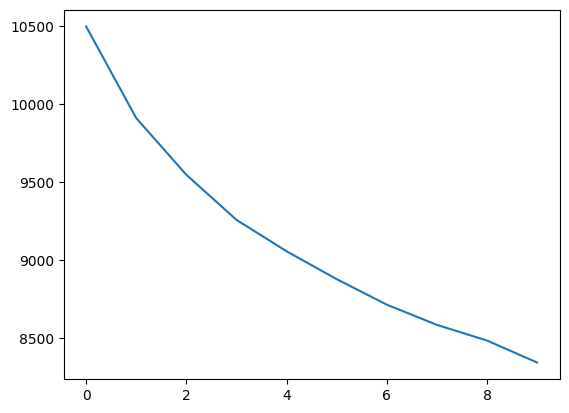

In [78]:
plt.plot(inertias)

In [80]:
inertias

[10495.34765625,
 9908.205078125,
 9545.181640625,
 9256.53515625,
 9055.2978515625,
 8876.62890625,
 8713.2060546875,
 8583.6953125,
 8483.40234375,
 8342.671875]

In [29]:
# no clear elbow ... trying bertopic now lol.

In [92]:
from bertopic import BERTopic

topic_model = BERTopic(embedding_model=None)
topics, probs = topic_model.fit_transform(df['full_text'], embeddings_norm)

print(topic_model.get_topic_info())

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment varia

      Topic   Count                                               Name  \
0        -1  484673                                -1_deleted_gt_do_so   
1         0     854                     0_invite_praise_task_inspiring   
2         1     772                             1_niche_anger_voice_g7   
3         2     660             2_insecurity_vulnerability_social_food   
4         3     619                                 3_change_climate__   
...     ...     ...                                                ...   
6138   6137      10        6137_punishment_hyprocrite_score9_comments3   
6139   6138      10  6138_povertymigration_overpopulation_hunger_in...   
6140   6139      10   6139_nile_httpstcoslrf8etxpu_anyplace_unbearably   
6141   6140      10              6140_stripes_trumpready_polls_phrases   
6142   6141      10       6141_tasted_ufensworth_childs_undernutrition   

                                         Representation  \
0     [deleted, gt, do, so, what, you, my, but, more

In [94]:
topic_info = topic_model.get_topic_info()

In [95]:
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,484673,-1_deleted_gt_do_so,"[deleted, gt, do, so, what, you, my, but, more...",[[liberals] So what is the method to deal with...
1,0,854,0_invite_praise_task_inspiring,"[invite, praise, task, inspiring, swedish, usa...",[/u/twerkin_not_werkin on “Please save your pr...
2,1,772,1_niche_anger_voice_g7,"[niche, anger, voice, g7, officials, focus, is...",[/u/xtpptn on Trump officials voice anger at G...
3,2,660,2_insecurity_vulnerability_social_food,"[insecurity, vulnerability, social, food, and,...","[Social vulnerability, Food insecurity and Cli..."
4,3,619,3_change_climate__,"[change, climate, , , , , , , , ]","[Climate change, Climate change, Climate Change]"
...,...,...,...,...,...
6138,6137,10,6137_punishment_hyprocrite_score9_comments3,"[punishment, hyprocrite, score9, comments3, sk...",[Climate change activists want punishment for ...
6139,6138,10,6138_povertymigration_overpopulation_hunger_in...,"[povertymigration, overpopulation, hunger, inc...","[Overpopulation, climate change will increase ..."
6140,6139,10,6139_nile_httpstcoslrf8etxpu_anyplace_unbearably,"[nile, httpstcoslrf8etxpu, anyplace, unbearabl...",[West Nile Virus: How Climate Change May Be Co...
6141,6140,10,6140_stripes_trumpready_polls_phrases,"[stripes, trumpready, polls, phrases, planetar...",[Experts: Polls Now Show Americans Of All Stri...


In [99]:
topic_info['Representative_Docs'][2]

["/u/xtpptn on Trump officials voice anger at G7 focus on 'niche' issues such as climate change || [removed]",
 "/u/Jben26 on Trump officials voice anger at G7 focus on 'niche' issues such as climate change || [removed]",
 "/u/nervozaur on Trump officials voice anger at G7 focus on 'niche' issues such as climate change || [removed]"]

In [31]:
# looks like issues with clustering are because each topic is about one headline. 
# could try deduplication but also can't really be bothered lol.
# also this is really slow so I'm using a 100k random sample now

In [26]:
np.random.seed(42)
indices_100k = np.random.choice(len(embeddings_norm), size=100000, replace=False)
df_100k = df.iloc[indices_100k]
embeddings_100k = embeddings_norm[indices_100k]

In [27]:
df_100k

,id,subreddit.id,subreddit.name,created_utc,permalink,selftext,title,full_text
36572,sg713o,hq6n1,redscarepod,1643541034,https://old.reddit.com/r/redscarepod/comments/...,,What are your plans for catastrophic climate c...,What are your plans for catastrophic climate c...
567547,2p4065,2s254,nuclearpower,1418416711,https://old.reddit.com/r/NuclearPower/comments...,,Back to the Future: Advanced Nuclear Energy an...,Back to the Future: Advanced Nuclear Energy an...
457451,6qvkvn,2qh1n,environment,1501586763,https://old.reddit.com/r/environment/comments/...,,We'll never tackle climate change if academics...,We'll never tackle climate change if academics...
537027,3z1q8e,32ntb,undeleteworldnews,1451676869,https://old.reddit.com/r/undeleteWorldNews/com...,,[#16] The Middle East could be looking at 140-...,[#16] The Middle East could be looking at 140-...
363190,a59vtt,2rsjy,iphoneography,1544555487,https://old.reddit.com/r/iPhoneography/comment...,[deleted],Lucky to see nature in it’s purest state. Clim...,Lucky to see nature in it’s purest state. Clim...
...,...,...,...,...,...,...,...,...
59305,q1z7ab,ialdx,tomorrowsworld,1633448887,https://old.reddit.com/r/tomorrowsworld/commen...,,Attribution science: Linking climate change to...,Attribution science: Linking climate change to...
76692,oowzlm,3icow,onguardforthee,1626895353,https://old.reddit.com/r/onguardforthee/commen...,,World leaders pause climate change talks out o...,World leaders pause climate change talks out o...
153040,go11zz,ne8p6,climateactionplan,1590081756,https://old.reddit.com/r/ClimateActionPlan/com...,,Climate change adaptation measures ensure food...,Climate change adaptation measures ensure food...
512478,5c6cdw,2qh13,worldnews,1478757803,https://old.reddit.com/r/worldnews/comments/5c...,,Moroccans protest UN Climate Change talks beca...,Moroccans protest UN Climate Change talks beca...


In [42]:
from bertopic import BERTopic
from sklearn.decomposition import PCA

pca = PCA(n_components = 100)

topic_model = BERTopic(embedding_model=None, min_topic_size=50)
topics, probs = topic_model.fit_transform(df_100k['full_text'], pca.fit_transform(embeddings_100k))

print(topic_model.get_topic_info())

     Topic  Count                                  Name  \
0       -1  37233                      -1_the_and_of_to   
1        0   2239             0_trump_epa_trumps_donald   
2        1   1386  1_protesters_protest_protests_london   
3        2   1277   2_canada_trudeau_canadian_canadians   
4        3   1244      3_exxon_oil_exxonmobil_companies   
..     ...    ...                                   ...   
283    282     52          282_humans_999_scientists_95   
284    283     52    283_affected_your_positive_effects   
285    284     52   284_banned_rscience_reddit_filtered   
286    285     51  285_advocates_away_system_transforms   
287    286     50  286_morrison_scott_cosmos_australias   

                                        Representation  \
0    [the, and, of, to, is, in, that, change, clima...   
1    [trump, epa, trumps, donald, pruitt, administr...   
2    [protesters, protest, protests, london, rebell...   
3    [canada, trudeau, canadian, canadians, canadas...   
4

In [43]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,37233,-1_the_and_of_to,"[the, and, of, to, is, in, that, change, clima...",[Technology Stuffs Cause Climate Change Global...
1,0,2239,0_trump_epa_trumps_donald,"[trump, epa, trumps, donald, pruitt, administr...","[Trump names Scott Pruitt, Oklahoma attorney g..."
2,1,1386,1_protesters_protest_protests_london,"[protesters, protest, protests, london, rebell...","[Protesters March For Climate Change, Extincti..."
3,2,1277,2_canada_trudeau_canadian_canadians,"[canada, trudeau, canadian, canadians, canadas...",[Justin Trudeau Says Green Party Win Means Cli...
4,3,1244,3_exxon_oil_exxonmobil_companies,"[exxon, oil, exxonmobil, companies, mobil, sue...",[Exxon Mobil ‘misled’ public on climate change...
...,...,...,...,...,...
283,282,52,282_humans_999_scientists_95,"[humans, 999, scientists, 95, caused, human, 9...",[Top scientists blame humans for climate chang...
284,283,52,283_affected_your_positive_effects,"[affected, your, positive, effects, how, gr, a...","[How has climate change affected you?, How has..."
285,284,52,284_banned_rscience_reddit_filtered,"[banned, rscience, reddit, filtered, spam, ban...",[The readers' editor on publishing letters fro...
286,285,51,285_advocates_away_system_transforms,"[advocates, away, system, transforms, fuels, t...",[Bernie Sanders: Our campaign is about thinkin...


In [44]:
topic_model.get_topic_info()["Representation"][4]

['exxon',
 'oil',
 'exxonmobil',
 'companies',
 'mobil',
 'sues',
 'big',
 'lawsuit',
 'knew',
 'shareholders']

In [64]:
df_100k['Topic'] = topics

In [65]:
df_100k['Date'] = pd.to_datetime(df_100k['created_utc'], unit='s')

In [66]:
df_100k['Date']

36572    2022-01-30 11:10:34
567547   2014-12-12 20:38:31
457451   2017-08-01 11:26:03
537027   2016-01-01 19:34:29
363190   2018-12-11 19:11:27
                 ...        
59305    2021-10-05 15:48:07
76692    2021-07-21 19:22:33
153040   2020-05-21 17:22:36
512478   2016-11-10 06:03:23
556604   2015-05-25 14:32:44
Name: Date, Length: 100000, dtype: datetime64[ns]

In [67]:
df_vis = df_100k[df_100k['Topic'] != -1].copy()

In [68]:
df_vis

,id,subreddit.id,subreddit.name,created_utc,permalink,selftext,title,full_text,Topics,Date,Topic
567547,2p4065,2s254,nuclearpower,1418416711,https://old.reddit.com/r/NuclearPower/comments...,,Back to the Future: Advanced Nuclear Energy an...,Back to the Future: Advanced Nuclear Energy an...,28,2014-12-12 20:38:31,28
457451,6qvkvn,2qh1n,environment,1501586763,https://old.reddit.com/r/environment/comments/...,,We'll never tackle climate change if academics...,We'll never tackle climate change if academics...,66,2017-08-01 11:26:03,66
537027,3z1q8e,32ntb,undeleteworldnews,1451676869,https://old.reddit.com/r/undeleteWorldNews/com...,,[#16] The Middle East could be looking at 140-...,[#16] The Middle East could be looking at 140-...,114,2016-01-01 19:34:29,114
363190,a59vtt,2rsjy,iphoneography,1544555487,https://old.reddit.com/r/iPhoneography/comment...,[deleted],Lucky to see nature in it’s purest state. Clim...,Lucky to see nature in it’s purest state. Clim...,117,2018-12-11 19:11:27,117
145299,hv9md4,2fp314,ddnews,1595346175,https://old.reddit.com/r/DDnews/comments/hv9md...,,Polar bears could be wiped out by 2100 due to ...,Polar bears could be wiped out by 2100 due to ...,86,2020-07-21 15:42:55,86
...,...,...,...,...,...,...,...,...,...,...,...
183103,en61vp,2qh6q,green,1578739810,https://old.reddit.com/r/Green/comments/en61vp...,,Australia is burning. The Arctic is melting. Y...,Australia is burning. The Arctic is melting. Y...,50,2020-01-11 10:50:10,50
59305,q1z7ab,ialdx,tomorrowsworld,1633448887,https://old.reddit.com/r/tomorrowsworld/commen...,,Attribution science: Linking climate change to...,Attribution science: Linking climate change to...,51,2021-10-05 15:48:07,51
76692,oowzlm,3icow,onguardforthee,1626895353,https://old.reddit.com/r/onguardforthee/commen...,,World leaders pause climate change talks out o...,World leaders pause climate change talks out o...,189,2021-07-21 19:22:33,189
512478,5c6cdw,2qh13,worldnews,1478757803,https://old.reddit.com/r/worldnews/comments/5c...,,Moroccans protest UN Climate Change talks beca...,Moroccans protest UN Climate Change talks beca...,1,2016-11-10 06:03:23,1


In [85]:
topic_time = df_vis.groupby([pd.Grouper(key='Date', freq='M'), 'Topic']).size()
topic_time = topic_time.reset_index(name='Count')

In [86]:
topic_pivot = topic_time.pivot(index='Date', columns='Topic', values='Count').fillna(0)
topic_pivot[range(100)]

Topic,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,1.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2010-02-28,1.0,0.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2010-03-31,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2010-04-30,2.0,0.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2010-05-31,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,0.0,24.0,10.0,8.0,22.0,6.0,17.0,4.0,2.0,4.0,...,6.0,1.0,4.0,1.0,5.0,4.0,0.0,0.0,20.0,0.0
2022-05-31,0.0,4.0,15.0,5.0,15.0,5.0,6.0,9.0,0.0,21.0,...,3.0,0.0,1.0,1.0,2.0,0.0,3.0,0.0,1.0,0.0
2022-06-30,1.0,11.0,6.0,1.0,12.0,8.0,5.0,9.0,9.0,3.0,...,5.0,1.0,2.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0


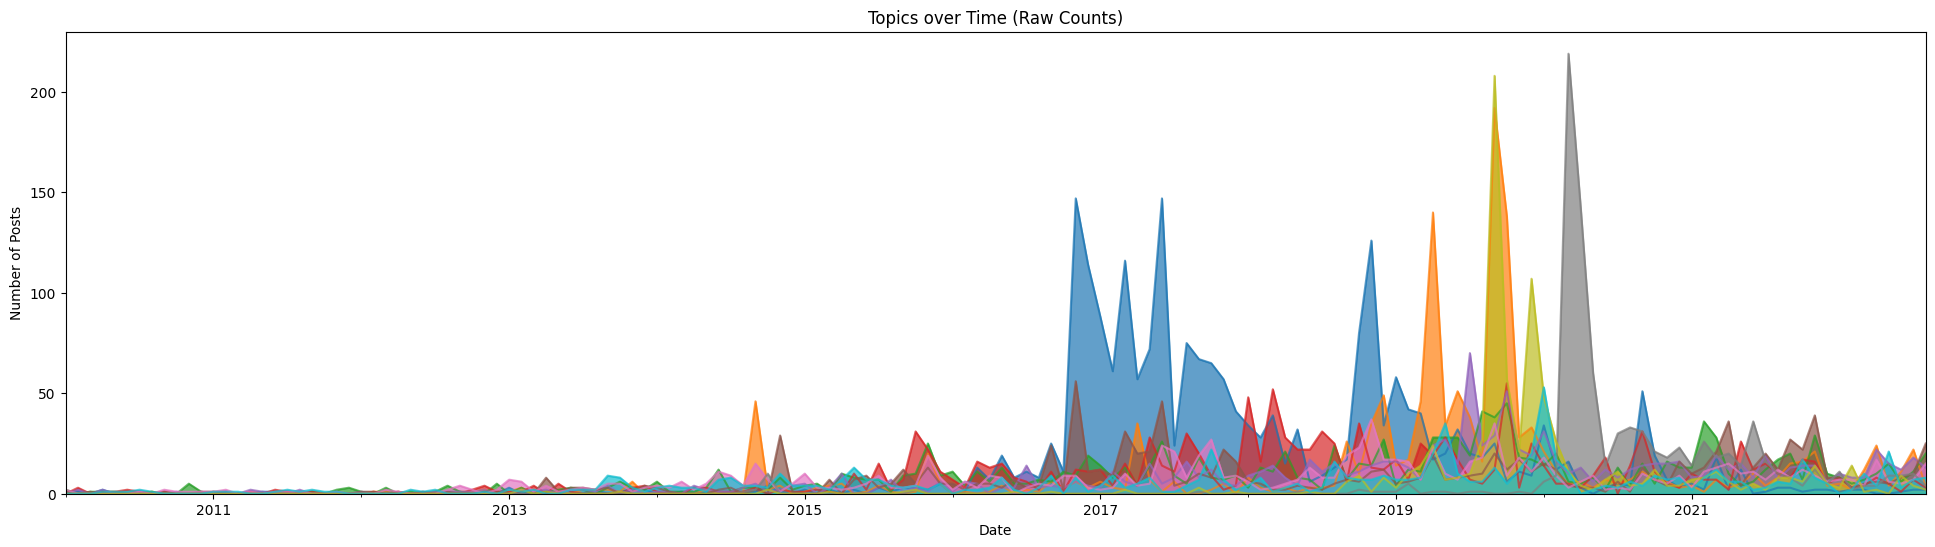

In [99]:
topic_pivot[range(10)].plot(kind='area', stacked=False, alpha=0.7, legend=False, figsize=(24,6))
plt.title("Topics over Time (Raw Counts)")
plt.ylabel("Number of Posts")
plt.xlabel("Date")
plt.show()

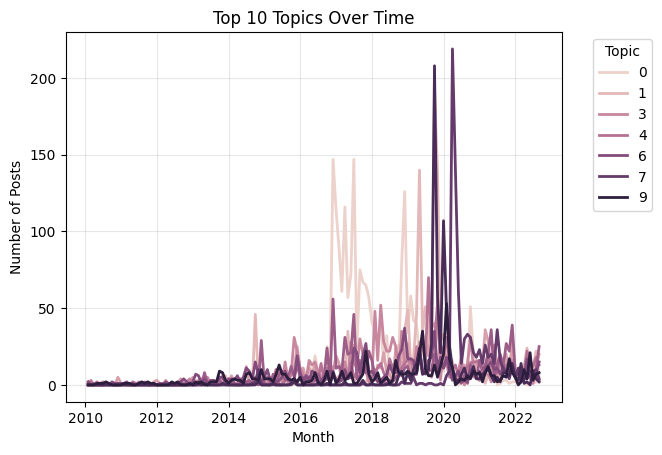

In [92]:
import seaborn as sns
topic_long = topic_pivot[range(10)].reset_index().melt(id_vars='Date', var_name='Topic', value_name='Count')

sns.lineplot(data=topic_long, x='Date', y='Count', hue='Topic', linewidth=2)
plt.title("Top 10 Topics Over Time")
plt.ylabel("Number of Posts")
plt.xlabel("Month")
plt.grid(alpha=0.3)
plt.legend(title='Topic', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


<Axes: xlabel='Date'>

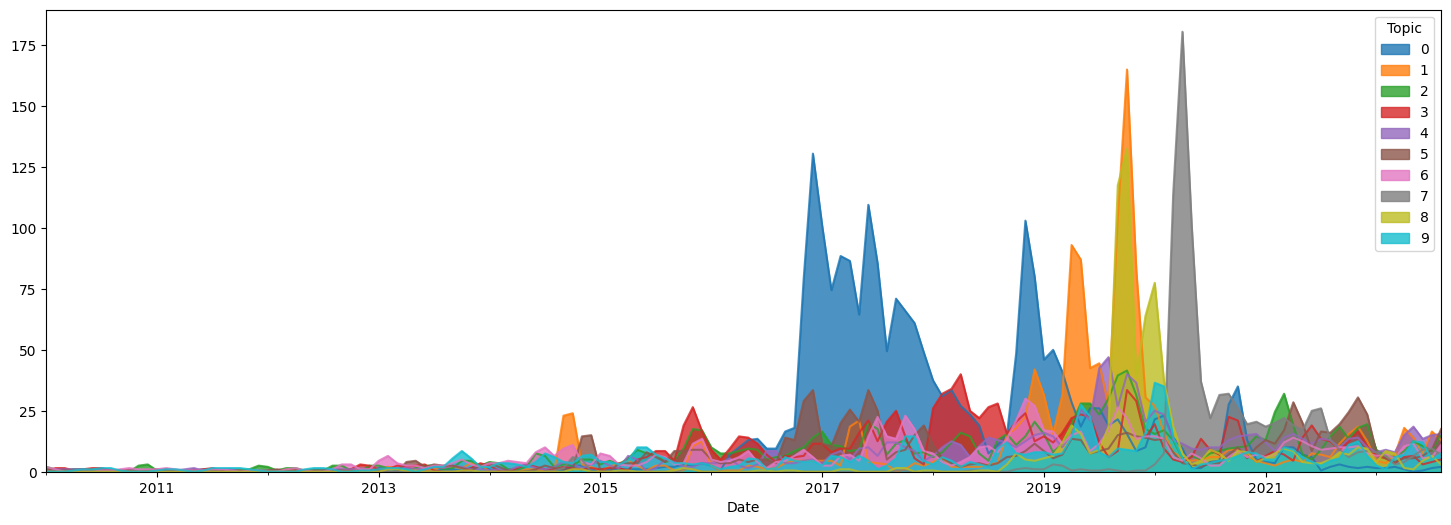

In [101]:
topic_top_pivot_smooth = topic_pivot[range(10)].rolling(2, min_periods=1).mean()  # 2-month rolling average
topic_top_pivot_smooth.plot(kind='area', stacked=False, alpha=0.8, figsize=(18,6))


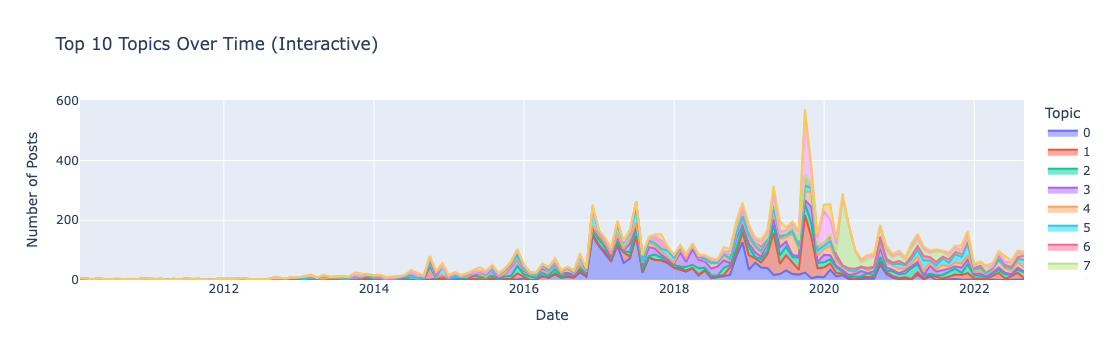

In [103]:
import plotly.express as px

topic_long = topic_pivot[range(10)].reset_index().melt(id_vars='Date', var_name='Topic', value_name='Count')

fig = px.area(topic_long, x='Date', y='Count', color='Topic',
              title='Top 10 Topics Over Time (Interactive)',
              labels={'Count':'Number of Posts'})
fig.update_layout(legend_title_text='Topic')
fig.show()

In [116]:
df_100k['embedding'] = embeddings_100k.tolist()

In [117]:
df_100k.to_csv("df_100k.csv", index=False)

In [118]:
df_100k

,id,subreddit.id,subreddit.name,created_utc,permalink,selftext,title,full_text,Topics,Date,Topic,embedding
36572,sg713o,hq6n1,redscarepod,1643541034,https://old.reddit.com/r/redscarepod/comments/...,,What are your plans for catastrophic climate c...,What are your plans for catastrophic climate c...,-1,2022-01-30 11:10:34,-1,"[-0.06725998967885971, 0.12545600533485413, 0...."
567547,2p4065,2s254,nuclearpower,1418416711,https://old.reddit.com/r/NuclearPower/comments...,,Back to the Future: Advanced Nuclear Energy an...,Back to the Future: Advanced Nuclear Energy an...,28,2014-12-12 20:38:31,28,"[-0.07140631228685379, 0.09612458944320679, 0...."
457451,6qvkvn,2qh1n,environment,1501586763,https://old.reddit.com/r/environment/comments/...,,We'll never tackle climate change if academics...,We'll never tackle climate change if academics...,66,2017-08-01 11:26:03,66,"[0.017613369971513748, 0.006337254773825407, 0..."
537027,3z1q8e,32ntb,undeleteworldnews,1451676869,https://old.reddit.com/r/undeleteWorldNews/com...,,[#16] The Middle East could be looking at 140-...,[#16] The Middle East could be looking at 140-...,114,2016-01-01 19:34:29,114,"[0.01916680857539177, 0.11793225258588791, 0.1..."
363190,a59vtt,2rsjy,iphoneography,1544555487,https://old.reddit.com/r/iPhoneography/comment...,[deleted],Lucky to see nature in it’s purest state. Clim...,Lucky to see nature in it’s purest state. Clim...,117,2018-12-11 19:11:27,117,"[0.03166889771819115, 0.09054936468601227, 0.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...
59305,q1z7ab,ialdx,tomorrowsworld,1633448887,https://old.reddit.com/r/tomorrowsworld/commen...,,Attribution science: Linking climate change to...,Attribution science: Linking climate change to...,51,2021-10-05 15:48:07,51,"[-0.08364474028348923, -0.003513436997309327, ..."
76692,oowzlm,3icow,onguardforthee,1626895353,https://old.reddit.com/r/onguardforthee/commen...,,World leaders pause climate change talks out o...,World leaders pause climate change talks out o...,189,2021-07-21 19:22:33,189,"[0.03264515846967697, 0.07933308184146881, 0.0..."
153040,go11zz,ne8p6,climateactionplan,1590081756,https://old.reddit.com/r/ClimateActionPlan/com...,,Climate change adaptation measures ensure food...,Climate change adaptation measures ensure food...,-1,2020-05-21 17:22:36,-1,"[-0.011509647592902184, 0.10701316595077515, 0..."
512478,5c6cdw,2qh13,worldnews,1478757803,https://old.reddit.com/r/worldnews/comments/5c...,,Moroccans protest UN Climate Change talks beca...,Moroccans protest UN Climate Change talks beca...,1,2016-11-10 06:03:23,1,"[0.008969089016318321, 0.13170132040977478, 0...."


In [119]:
import os

api_key = os.getenv("OPENAI_API_KEY")
print(api_key)

None


In [124]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,37233,-1_the_and_of_to,"[the, and, of, to, is, in, that, change, clima...",[Technology Stuffs Cause Climate Change Global...
1,0,2239,0_trump_epa_trumps_donald,"[trump, epa, trumps, donald, pruitt, administr...","[Trump names Scott Pruitt, Oklahoma attorney g..."
2,1,1386,1_protesters_protest_protests_london,"[protesters, protest, protests, london, rebell...","[Protesters March For Climate Change, Extincti..."
3,2,1277,2_canada_trudeau_canadian_canadians,"[canada, trudeau, canadian, canadians, canadas...",[Justin Trudeau Says Green Party Win Means Cli...
4,3,1244,3_exxon_oil_exxonmobil_companies,"[exxon, oil, exxonmobil, companies, mobil, sue...",[Exxon Mobil ‘misled’ public on climate change...
...,...,...,...,...,...
283,282,52,282_humans_999_scientists_95,"[humans, 999, scientists, 95, caused, human, 9...",[Top scientists blame humans for climate chang...
284,283,52,283_affected_your_positive_effects,"[affected, your, positive, effects, how, gr, a...","[How has climate change affected you?, How has..."
285,284,52,284_banned_rscience_reddit_filtered,"[banned, rscience, reddit, filtered, spam, ban...",[The readers' editor on publishing letters fro...
286,285,51,285_advocates_away_system_transforms,"[advocates, away, system, transforms, fuels, t...",[Bernie Sanders: Our campaign is about thinkin...


In [130]:
topic_model.get_topic_info().iloc[1]['Representation']

['trump',
 'epa',
 'trumps',
 'donald',
 'pruitt',
 'administration',
 'scott',
 'website',
 'president',
 'he']

In [131]:
topic_model.get_topic_info().to_csv("topic_info.csv")

In [2]:
import pandas as pd

file_path = "topic_info.csv"

topic_info_df = pd.read_csv(file_path)

print(topic_info_df.head())


   Unnamed: 0  Topic  Count                                  Name  \
0           0     -1  37233                      -1_the_and_of_to   
1           1      0   2239             0_trump_epa_trumps_donald   
2           2      1   1386  1_protesters_protest_protests_london   
3           3      2   1277   2_canada_trudeau_canadian_canadians   
4           4      3   1244      3_exxon_oil_exxonmobil_companies   

                                      Representation  \
0  ['the', 'and', 'of', 'to', 'is', 'in', 'that',...   
1  ['trump', 'epa', 'trumps', 'donald', 'pruitt',...   
2  ['protesters', 'protest', 'protests', 'london'...   
3  ['canada', 'trudeau', 'canadian', 'canadians',...   
4  ['exxon', 'oil', 'exxonmobil', 'companies', 'm...   

                                 Representative_Docs  
0  ['Technology Stuffs Cause Climate Change Globa...  
1  ['Trump names Scott Pruitt, Oklahoma attorney ...  
2  ['Protesters March For Climate Change', 'Extin...  
3  ['Justin Trudeau Says Gre

In [14]:
import openai
import os

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

def generateName(representativeWords):
    response = client.responses.create(
        model="gpt-5-mini-2025-08-07",
        input="Given this list of words: " + str(representativeWords) + ", return a brief phrase that encapsulates the title for topic analysis of Reddit climate change posts."
    )
    return response.output_text

print(generateName(topic_info_df['Representation'][2]))

"Extinction Rebellion: London Protests and Arrests"


In [18]:
topic_info_df['Title'] = topic_info_df['Representation'].apply(generateName)

In [19]:
topic_info_df

,Unnamed: 0,Topic,Count,Name,Representation,Representative_Docs,Title
0,0,-1,37233,-1_the_and_of_to,"['the', 'and', 'of', 'to', 'is', 'in', 'that',...",['Technology Stuffs Cause Climate Change Globa...,We and Climate Change: Topic Analysis of Reddi...
1,1,0,2239,0_trump_epa_trumps_donald,"['trump', 'epa', 'trumps', 'donald', 'pruitt',...","['Trump names Scott Pruitt, Oklahoma attorney ...",Trump Administration: EPA & Scott Pruitt
2,2,1,1386,1_protesters_protest_protests_london,"['protesters', 'protest', 'protests', 'london'...","['Protesters March For Climate Change', 'Extin...",Extinction Rebellion: London protests and arrests
3,3,2,1277,2_canada_trudeau_canadian_canadians,"['canada', 'trudeau', 'canadian', 'canadians',...",['Justin Trudeau Says Green Party Win Means Cl...,"Canadian climate politics — Trudeau, provinces..."
4,4,3,1244,3_exxon_oil_exxonmobil_companies,"['exxon', 'oil', 'exxonmobil', 'companies', 'm...",['Exxon Mobil ‘misled’ public on climate chang...,Shareholders sue ExxonMobil over concealed oil...
...,...,...,...,...,...,...,...
283,283,282,52,282_humans_999_scientists_95,"['humans', '999', 'scientists', '95', 'caused'...",['Top scientists blame humans for climate chan...,Scientific consensus: human activity causes cl...
284,284,283,52,283_affected_your_positive_effects,"['affected', 'your', 'positive', 'effects', 'h...","['How has climate change affected you?', 'How ...",How Climate Change Affects You and Your Area
285,285,284,52,284_banned_rscience_reddit_filtered,"['banned', 'rscience', 'reddit', 'filtered', '...",['The readers\' editor on publishing letters f...,"""Reddit Moderation: Bans, Filters, and Climate..."
286,286,285,51,285_advocates_away_system_transforms,"['advocates', 'away', 'system', 'transforms', ...",['Bernie Sanders: Our campaign is about thinki...,Bernie Sanders advocates systemic shift from f...


In [28]:
topic_info_df.to_csv("topic_info.csv")